In [2]:
from urllib.request import urlretrieve

italy_covid_url = "https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv"

urlretrieve(italy_covid_url, "italy-covid-daywise.csv")

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7482c5ff8bf0>)

In [5]:
import pandas as pd

covid_df = pd.read_csv("italy-covid-daywise.csv")
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [10]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [12]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [14]:
covid_df.shape

(248, 4)

In [27]:
covid_df[["date", "new_cases"]]

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [30]:
covid_df.loc[200]

date          2020-07-18
new_cases          231.0
new_deaths          11.0
new_tests        27569.0
Name: 200, dtype: object

In [32]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [34]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [37]:
covid_df["new_tests"].first_valid_index()

111

In [41]:
covid_df.loc[100:108]

,date,new_cases,new_deaths,new_tests
100,2020-04-09,3836.0,540.0,NaN
101,2020-04-10,4204.0,612.0,NaN
102,2020-04-11,3951.0,570.0,NaN
103,2020-04-12,4694.0,619.0,NaN
104,2020-04-13,4092.0,431.0,NaN
105,2020-04-14,3153.0,564.0,NaN
106,2020-04-15,2972.0,604.0,NaN
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN


In [43]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
186,2020-07-04,223.0,15.0,28946.0
134,2020-05-13,1402.0,172.0,37049.0
85,2020-03-25,5249.0,743.0,NaN
57,2020-02-26,93.0,5.0,NaN
102,2020-04-11,3951.0,570.0,NaN
77,2020-03-17,4000.0,347.0,NaN
144,2020-05-23,652.0,130.0,42579.0
37,2020-02-06,0.0,0.0,NaN
127,2020-05-06,1075.0,236.0,37771.0
215,2020-08-02,295.0,5.0,24496.0


In [47]:
total_cases = covid_df["new_cases"].sum()
total_deaths = covid_df["new_deaths"].sum()

print(f"Total cases = {total_cases}, Total death = {total_deaths}")

Total cases = 271515.0, Total death = 35497.0


In [53]:
death_rate = total_deaths / total_cases
print("Death rate = {:0.2f}".format(death_rate))

Death rate = 0.13


In [60]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [61]:
covid_df[covid_df.new_cases > 1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [71]:
covid_df["positive_rate"] = covid_df.new_cases / covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [72]:
covid_df.drop(columns=["positive_rate"], inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [74]:
covid_df.sort_values("new_cases", ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [76]:
covid_df.sort_values("new_cases").head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [78]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [81]:
covid_df.at[172, "new_cases"] = (
    covid_df.at[171, "new_cases"] + covid_df.at[172, "new_cases"]
) / 2
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.00,34.0,33957.0
170,2020-06-18,328.00,43.0,32921.0
171,2020-06-19,331.00,66.0,28570.0
172,2020-06-20,211.25,47.0,29875.0
173,2020-06-21,264.00,49.0,24581.0
174,2020-06-22,224.00,24.0,16152.0
175,2020-06-23,221.00,23.0,23225.0


In [84]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [87]:
covid_df["date"] = pd.to_datetime(covid_df.date)
covid_df["date"]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [90]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [93]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [95]:
# Overall average
covid_df.new_cases.mean()

np.float64(1096.2671370967741)

In [98]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

np.float64(1247.2571428571428)

In [100]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.00,0.0,0.0
2,885.00,21.0,0.0
3,100851.00,11570.0,0.0
4,101852.00,16091.0,419591.0
5,29073.00,5658.0,1078720.0
6,8131.25,1404.0,830354.0
7,6722.00,388.0,797692.0
8,21060.00,345.0,1098704.0
9,3297.00,20.0,54395.0


In [102]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,271.041667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [104]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.00,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.00,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.00,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.00,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267212.25,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268577.25,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269573.25,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270548.25,35491.0,NaN


In [106]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x74829804ac00>)

In [108]:
locations_df = pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [110]:
covid_df["location"] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.00,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.00,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.00,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.00,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.00,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267212.25,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268577.25,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269573.25,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270548.25,35491.0,NaN,Italy


In [112]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267212.25,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268577.25,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269573.25,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270548.25,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [114]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.00,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267212.25,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4419.519866,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268577.25,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4442.096094,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269573.25,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4458.569298,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270548.25,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4474.695175,586.998461,NaN


In [133]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267212.25,1.0,35473.0,53541.0,4182478.0,4419.519866,586.700753,69175.513516
244,2020-08-31,1365.0,268577.25,4.0,35477.0,42583.0,4225061.0,4442.096094,586.766910,69879.809125
245,2020-09-01,996.0,269573.25,6.0,35483.0,54395.0,4279456.0,4458.569298,586.866146,70779.467667
246,2020-09-02,975.0,270548.25,8.0,35491.0,NaN,NaN,4474.695175,586.998461,NaN


In [118]:
result_df.to_csv('results.csv', index=None)

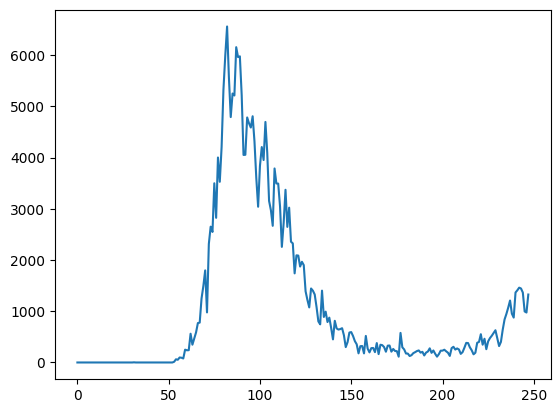

In [120]:
result_df.new_cases.plot();

In [134]:
result_df.set_index('date', inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.00,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267212.25,1.0,35473.0,53541.0,4182478.0,4419.519866,586.700753,69175.513516
2020-08-31,1365.0,268577.25,4.0,35477.0,42583.0,4225061.0,4442.096094,586.766910,69879.809125
2020-09-01,996.0,269573.25,6.0,35483.0,54395.0,4279456.0,4458.569298,586.866146,70779.467667


<Axes: xlabel='date'>

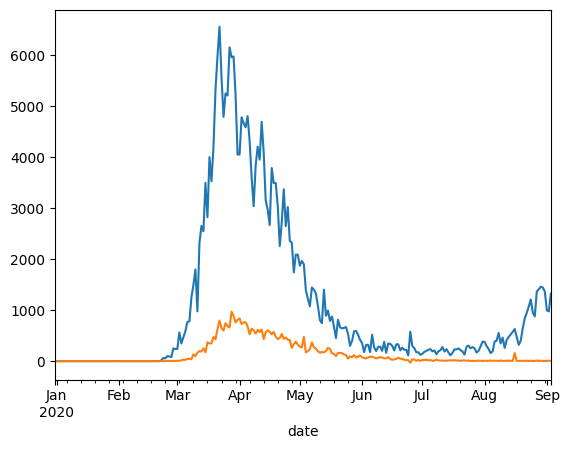

In [131]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

<Axes: xlabel='date'>

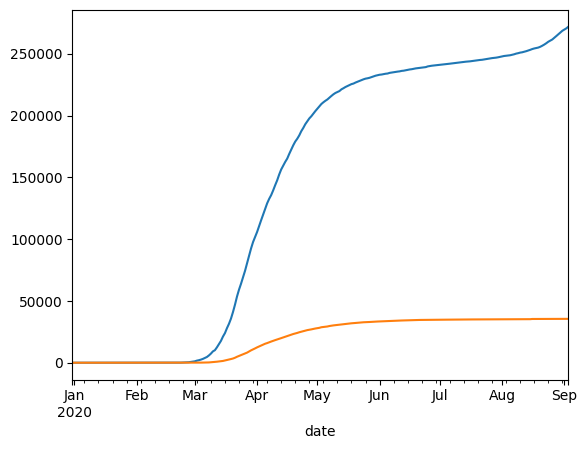

In [135]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

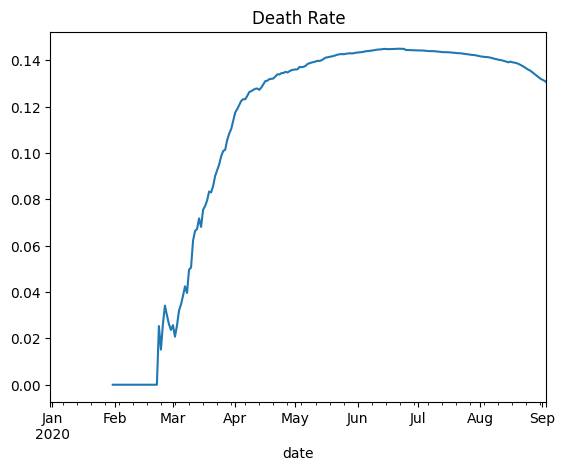

In [137]:
death_rate = result_df.total_deaths / result_df.total_cases
death_rate.plot(title='Death Rate');

<Axes: title={'center': 'Positive Rate'}, xlabel='date'>

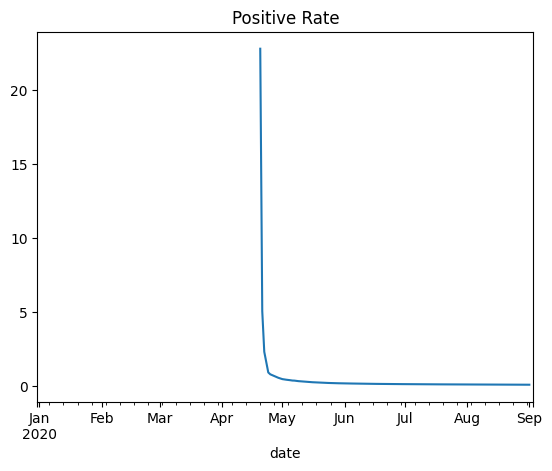

In [141]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate')

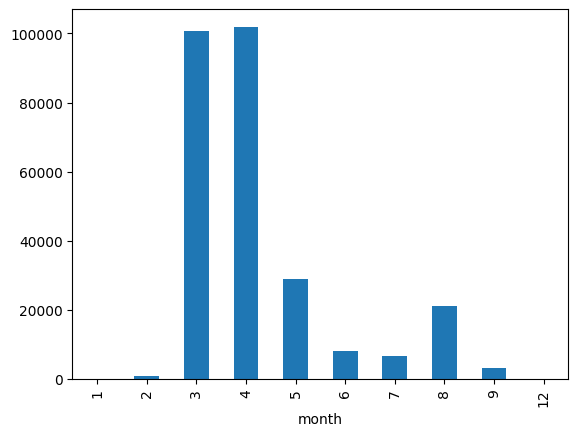

In [143]:
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

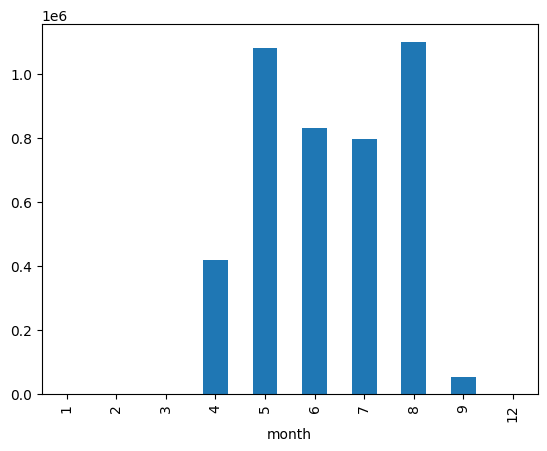

In [144]:
covid_month_df.new_tests.plot(kind='bar')